In [ ]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

## Download Dataset
https://www.kaggle.com/clarencezhao/handwritten-math-symbol-dataset

## Read dataset

In [ ]:
dataset_path = "/home/anton/Downloads/archive/train"
symbols_list = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']
train_image = []
train_label = []
for symbols_dir in os.listdir(dataset_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(dataset_path + "/" + symbols_dir):
            train_label.append(symbols_dir.split()[0])
            train_image.append(dataset_path + "/" + symbols_dir + "/" + image)

In [ ]:
eval_path = "/home/anton/Downloads/archive/eval"
test_image = []
test_label = []

for symbols_dir in os.listdir(eval_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(eval_path + "/" + symbols_dir):
            test_label.append(symbols_dir.split()[0])
            test_image.append(eval_path + "/" + symbols_dir + "/" + image)

In [ ]:
print("Length of train_image : " , len(train_image) , " , length of labels list : " ,len(train_label))
print("Length of test_image : " , len(test_image) , " , length of labels list : " ,len(test_label))

In [ ]:
unique_test = list(set(test_label))
unique_train = list(set(train_label))
print("Length of test unique labels: " , len(unique_test) , " : " , unique_test)
print("Length of train unique labels: " , len(unique_train) , " : " , unique_train)

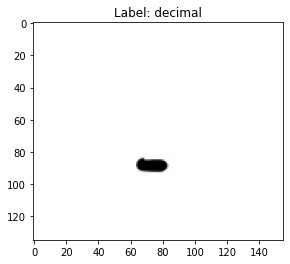

In [29]:
import random
random_idx = random.randint(0,train_image.__len__())
image = cv2.imread(train_image[random_idx])
plt.imshow(image)
plt.title("Label: " + train_label[random_idx])
plt.show()

## Creating train test and validation set

In [30]:
X_train = []
X_test = []

# laoding the images from the path
for path in train_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    X_train.append(img)

for path in test_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)     
    X_test.append(img)

# creating numpy array from the images
X_train = np.array(X_train)
X_test = np.array(X_test)

In [31]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (7557, 100, 100, 3)
X_test shape:  (1010, 100, 100, 3)


### normalizing the data

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [35]:
from sklearn import preprocessing
# label encoding the 16 symbols
label_encoder = preprocessing.LabelEncoder()
y_train_temp = label_encoder.fit_transform(train_label)
y_test_temp = label_encoder.fit_transform(test_label)

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [39]:
# creating matrix labels list
y_train = keras.utils.np_utils.to_categorical(y_train_temp, 16)
y_test = keras.utils.np_utils.to_categorical(y_test_temp, 16)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (7557, 16)
y_test shape:  (1010, 16)


## Creating Sequential model

In [40]:
# using sequential model for training
model = Sequential()

# 1st layer and taking input in this of shape 100x100x3 ->  100 x 100 pixles and 3 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

# maxpooling will take highest value from a filter of 2*2 shape
model.add(MaxPooling2D(pool_size=(2, 2)))

# it will prevent overfitting by making it hard for the model to idenify the images
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

# last layer predicts 16 labels
model.add(Dense(16, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

2021-12-21 01:32:54.702525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 01:32:54.703047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anton/anaconda3/envs/photomath/lib/python3.7/site-packages/cv2/../../lib64:/home/anton/ea202012001_adas_asw_sop/build/devel/lib:/opt/ros/noetic/lib
2021-12-21 01:32:54.703141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anton/anaconda3/envs/photomath/lib/python3.7/site-packages/cv2/../../lib64:/home/anton/ea202012001_adas_asw_sop/build/devel/lib:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        36928     
                                                        

In [51]:
# displaying the model
import keras
keras.utils.vis_utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
